# Multistage Collaborative Knowledge Distillation on semantic segmentation [DEMO]

In this notebook, we perform inference using our two final NN models for semantic segmentation. The two models are the results of the [Multistage Collaborative Knowledge Distillation (MCKD)](https://arxiv.org/pdf/2311.08640v1.pdf) technique applied to two different training datasets ([Coco](https://cocodataset.org/) and [Cityscapes](https://www.cityscapes-dataset.com/)). They share the same architecture, but they have different parameters' values. Each model will be tested on few never-seen samples of the dataset it has been trained on. The predictions generated by the models provides us qualitative results to spotlight the real-time predictive prowess of our neural networks.

### Imports

In [1]:
import torch
from torchvision import transforms
from model.encoder_decoder import SwinDeepLabV3Plus

import requests
from PIL import Image

from utils.visualization import visualize_segmentation

## Inference function

In [2]:
def predict(img, dataset):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    # Preprocess img
    transform = transforms.Compose([
    transforms.Resize(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
    ])
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    # Load model
    match dataset:
        case "coco":
            num_classes = 133

        case "cityscapes":
            num_classes = 19

    checkpoint_path = f'../checkpoints/{dataset}/final_student_ckpt.pth'
    model = SwinDeepLabV3Plus(num_classes=num_classes, dataset=dataset).to(device)
    model.load_state_dict(torch.load(checkpoint_path))
    model.eval()

    # Forward
    with torch.no_grad():
        _, preds = model(img)

    return preds.squeeze(0)

## Coco dataset

Let's load two images from the Coco dataset and forward them through our final model to see what the resulting segmented images look like. The model has been trained on the same dataset.

### Load first image

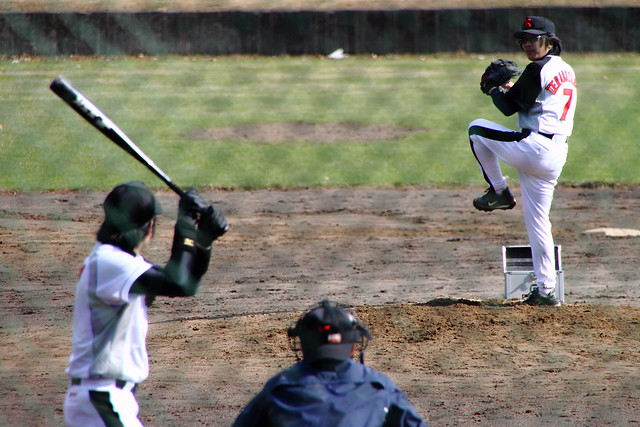

In [3]:
# Image from coco dataset
url_coco_1 = "http://farm5.staticflickr.com/4061/4567702843_54330458f4_z.jpg"
image_coco_1 = Image.open(requests.get(url_coco_1, stream=True).raw)
image_coco_1

In [4]:
segmentation_coco_1 = predict(img=image_coco_1, dataset="coco")

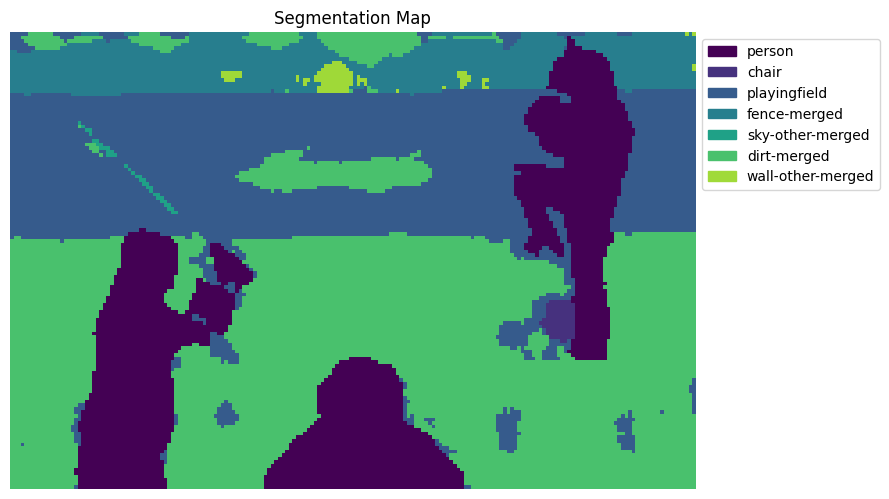

In [5]:
visualize_segmentation(segmentation_coco_1, "coco")

### Load second image

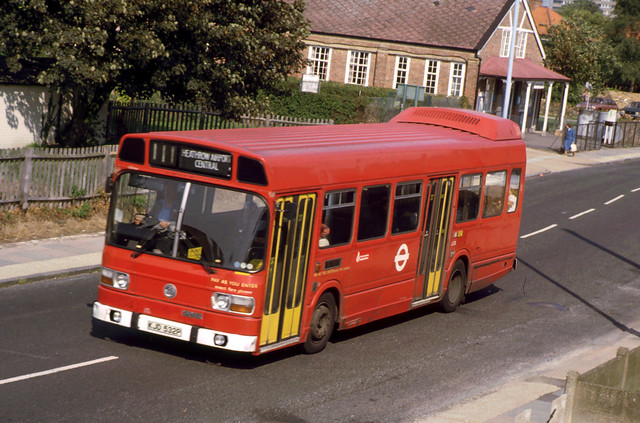

In [6]:
# Image from coco dataset
url_coco_2 = "http://farm4.staticflickr.com/3222/2954333124_245e134c84_z.jpg"
image_coco_2 = Image.open(requests.get(url_coco_2, stream=True).raw)
image_coco_2

In [7]:
segmentation_coco_2 = predict(img=image_coco_2, dataset="coco")

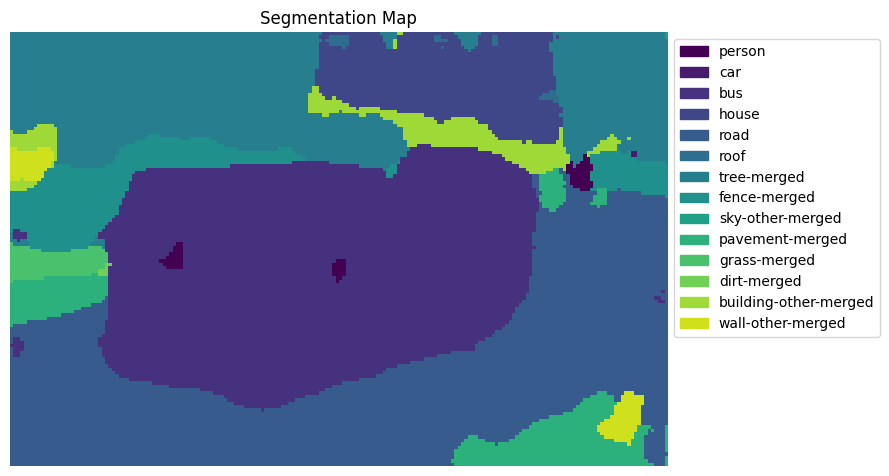

In [8]:
visualize_segmentation(segmentation_coco_2, "coco")

## Cityscapes dataset

Let's load two images from the Cityscapes dataset and forward them through our final model to see what the resulting segmented images look like. The model has been trained on the same dataset.

### Load first image

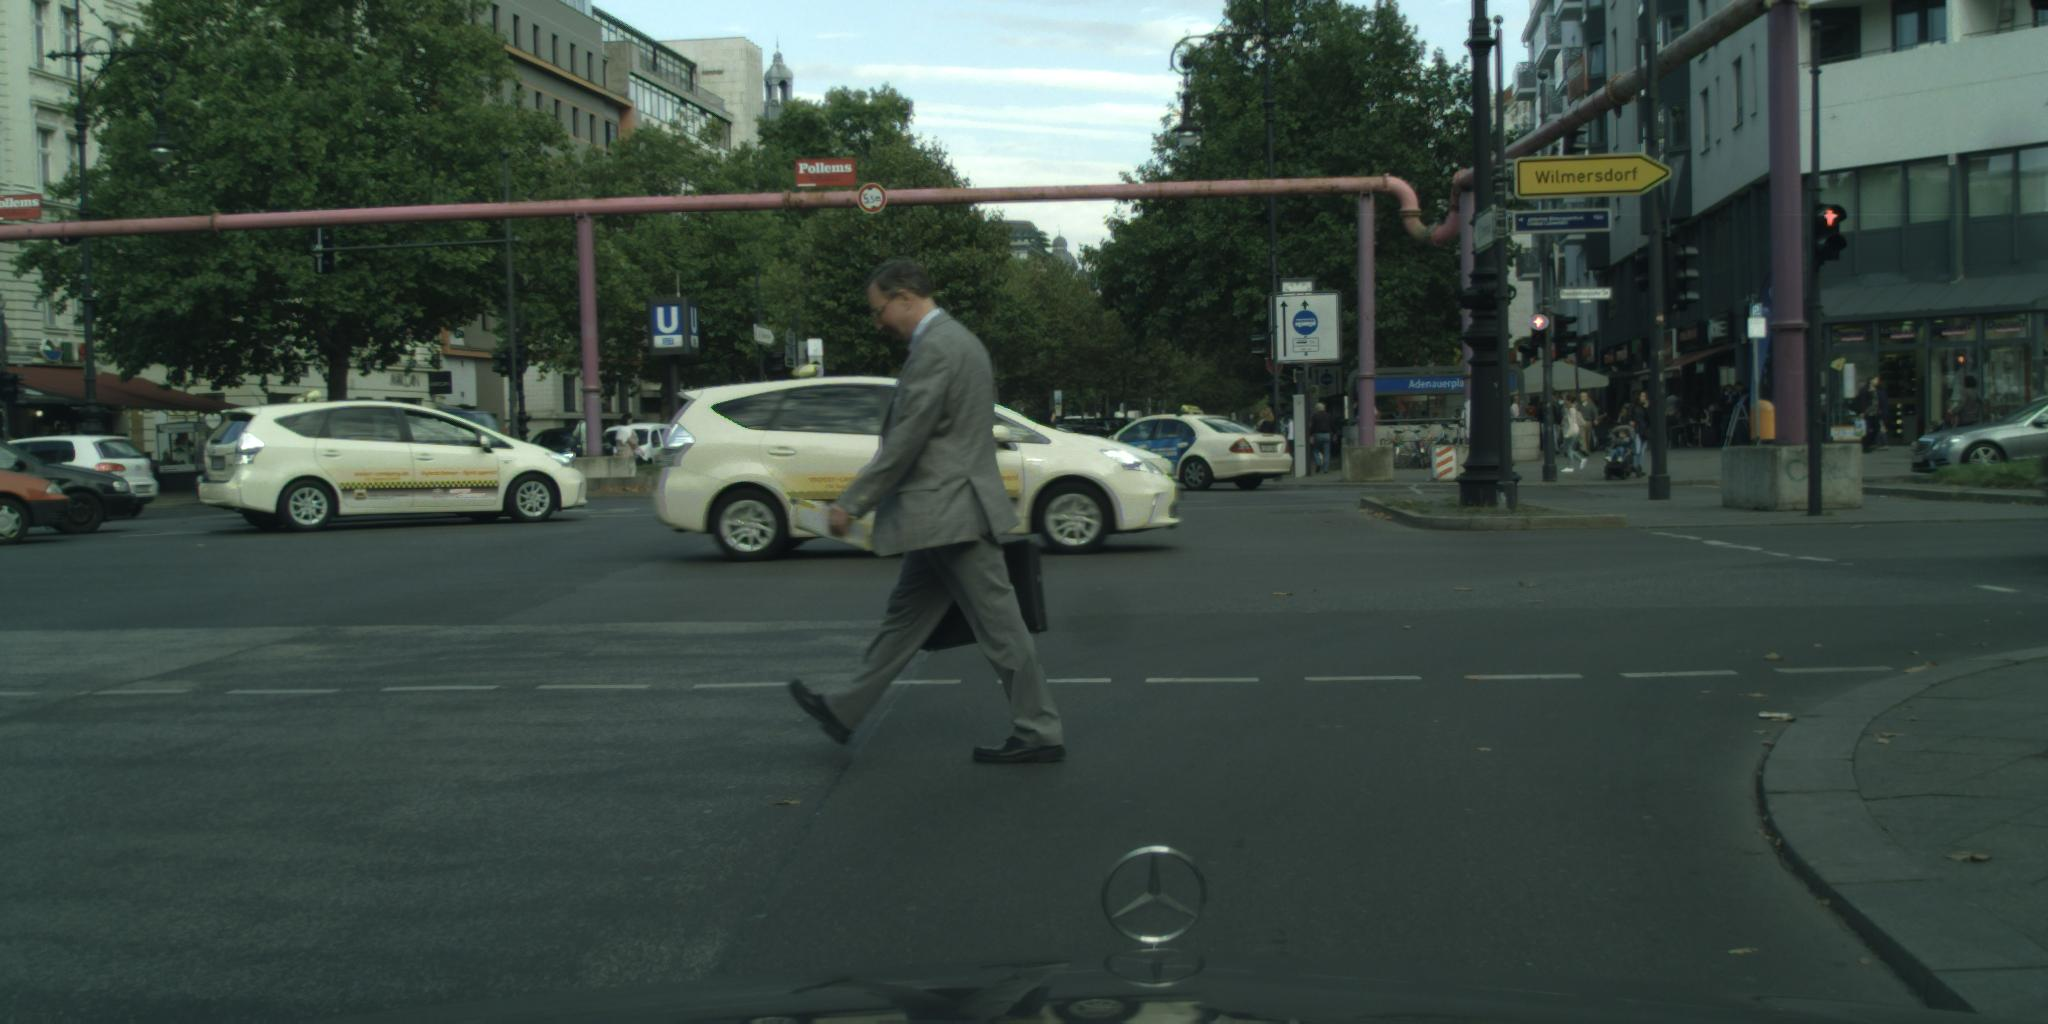

In [9]:
# Image from cityscapes dataset
url_cs_1 = "https://datasets-server.huggingface.co/assets/Chris1/cityscapes_segmentation/--/default/test/2/image/image.jpg"
image_cs_1 = Image.open(requests.get(url_cs_1, stream=True).raw)
image_cs_1

In [10]:
segmentation_cs_1 = predict(img=image_cs_1, dataset="cityscapes")

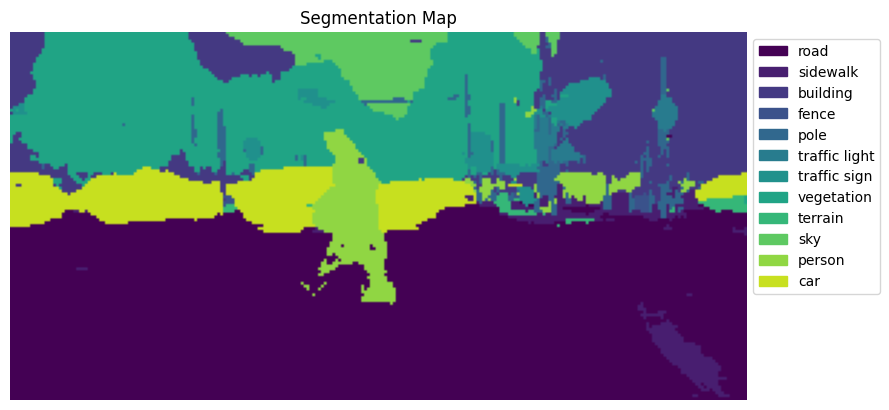

In [11]:
visualize_segmentation(segmentation_cs_1, "cityscapes")

### Load second image

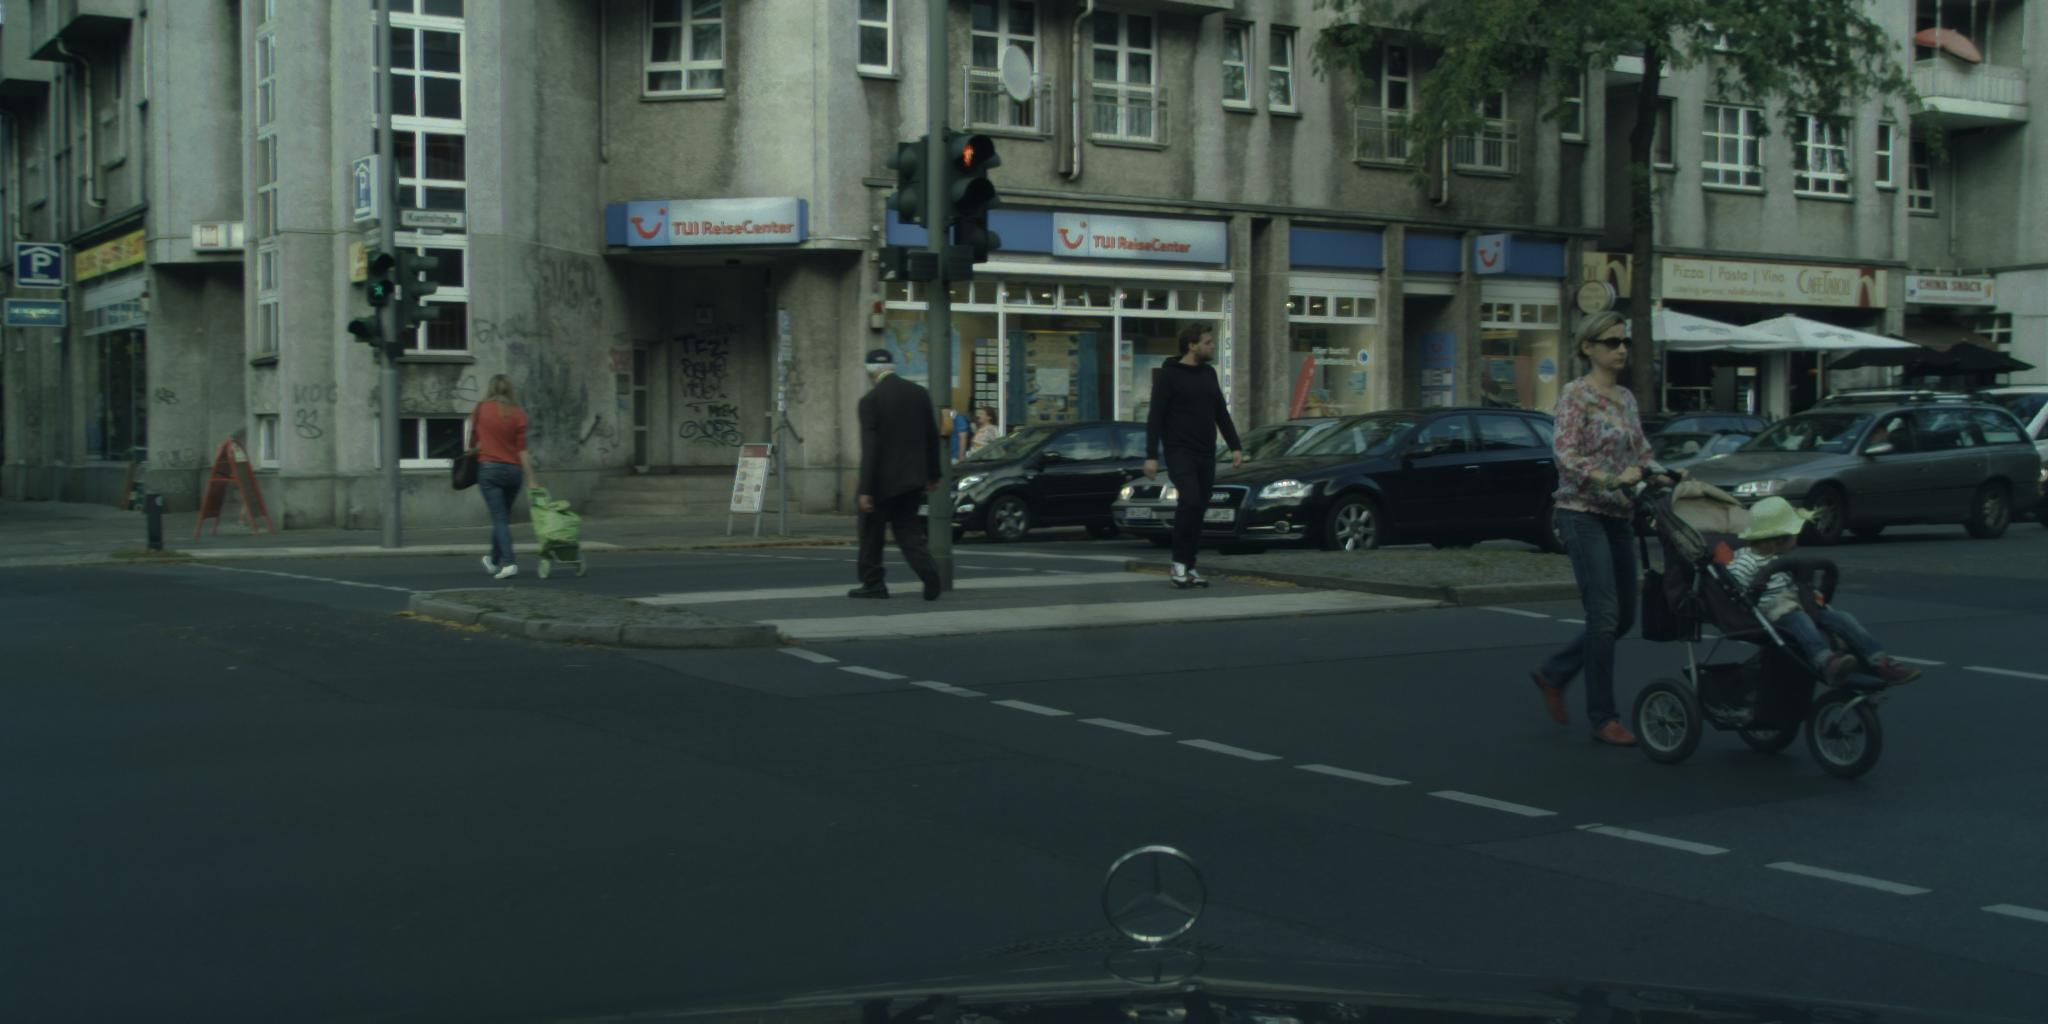

In [12]:
# Image from cityscapes dataset
url_cs_2 = "https://datasets-server.huggingface.co/assets/Chris1/cityscapes_segmentation/--/default/test/31/image/image.jpg"
image_cs_2 = Image.open(requests.get(url_cs_2, stream=True).raw)
image_cs_2

In [13]:
segmentation_cs_2 = predict(img=image_cs_2, dataset="cityscapes")

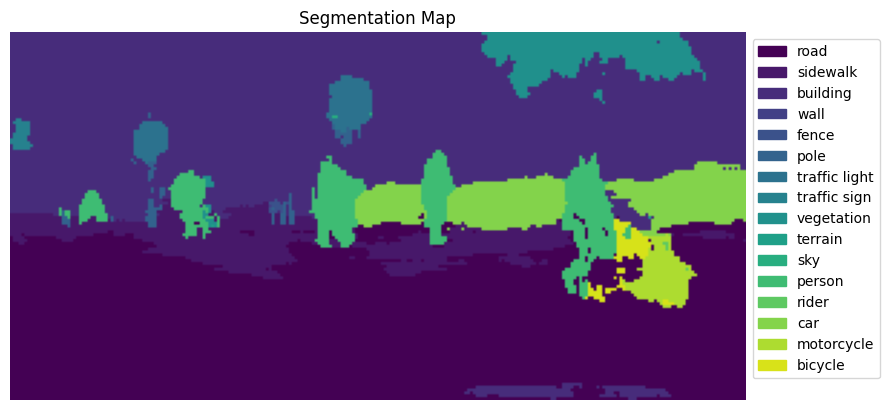

In [14]:
visualize_segmentation(segmentation_cs_2, "cityscapes")